# Punic Plots:
Do diverse new plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("No compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

from hapsburg.figures.plot_bars import plot_panel_row, prepare_dfs_plot

### Hack for Basemaps
import mpl_toolkits
mpl_toolkits.__path__.append(
    '/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/basemap-1.2.1-py3.7-linux-x86_64.egg/mpl_toolkits/')
from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label
from hapsburg.figures.plot_individual_roh import plot_pde_individual, plot_roh_individual
from hapsburg.figures.plot_posterior import plot_posterior_cm

compute-e-16-233.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 28


In [2]:
def get_iids_df(df, iids=[]):
    """Get List of IIDs from Dataframe"""
    idx = df["iid"].isin(iids)
    df_t = df[idx].copy().reset_index(drop=True)
    print(f"Found {np.sum(idx)}/{len(iids)} Individuals")
    return df_t

# Load ROH Data and Context Indivdiuals

In [36]:
df1 = pd.read_csv("/n/groups/reich/hringbauer/hapsburg_runs/output/combined_roh05.v56.1.unique.tsv", sep='\t')
df1 = df1.sort_values(by="sum_roh>4", ascending=False)
print(f"Loaded {len(df1)} Individuals with ROH")

### Load context Individuals
df_context2 = pd.read_csv("./output/tables/reference_samples_plot.v54.1.tsv", sep="\t")
print(f"Loaded {len(df_context)} Individuals")

df_c1 = pd.merge(df1, df_context2[["iid", "label"]], on="iid")
print(f"Merged to {len(df_c1)} Context Individuals with ROH")

df_clst = pd.read_csv("./data/cluster_assignments_punic.v54.1h.tsv", sep="\t")
print(f"Loaded Cluster Information for {len(df_clst)} Individuals.\n")

Loaded 20398 Individuals with ROH
Loaded 146 Individuals
Merged to 71 Context Individuals with ROH
Loaded Cluster Information for 153 Individuals.



In [37]:
df_context2["label"].value_counts()

Canaanite MLBA          35
Sardinia BA             23
Iberia IA               20
Sicily Polizzello IA    19
Mycenean BA             12
Tunisia M/N              8
Guanche Pre-Contact      5
Menorca LBA              5
Sicily Motya MBA         5
Egypt Hellenistic        3
Algeria IA               1
Name: label, dtype: int64

In [43]:
df_context2[df_context2["label"].str.contains("Motya MBA")]

,iid,pc1,pc2,pc3,pc4,pop,Master ID,clst,loc,n_cov_snp,mean_cov,sex,age,contact,lat,lon,study,color,label
109,I22238,-0.000451,-0.020464,0.019014,-0.011087,include,I22238,Italy_Sicily_MBA,"Sicily, Motya",748924.0,0.624103,M,3705.0,"Caramelli, David",37.5353,12.2637,Unpublished (Harald Punic),olive,Sicily Motya MBA
110,I22241,0.000513,-0.021021,0.013660,-0.002315,include,I22241,Italy_Sicily_MBA,"Sicily, Motya",733193.0,0.610994,M,3485.0,"Caramelli, David",37.5353,12.2637,Unpublished (Harald Punic),olive,Sicily Motya MBA
111,I22242,-0.000551,-0.018367,0.015835,-0.014955,include,I22242,Italy_Sicily_MBA,"Sicily, Motya",213884.0,0.178237,F,3460.0,"Caramelli, David",37.5353,12.2637,Unpublished (Harald Punic),olive,Sicily Motya MBA
112,I22234,0.000204,-0.016891,0.012316,-0.002319,include,I22234,Italy_Sicily_MBA,"Sicily, Motya",186867.0,0.155723,F,3835.0,"Caramelli, David",37.5353,12.2637,Unpublished (Harald Punic),olive,Sicily Motya MBA
113,I22237,-0.025952,-0.041149,-0.030868,-0.030950,include,I22237,Italy_Sicily_MBA_oAfrica,"Sicily, Motya",98984.0,0.082487,F,3480.0,"Caramelli, David",37.5353,12.2637,Unpublished (Harald Punic),olive,Sicily Motya MBA


In [45]:
df_context2[df_context2["study"].str.contains("Unpublished")]

,iid,pc1,pc2,pc3,pc4,pop,Master ID,clst,loc,n_cov_snp,mean_cov,sex,age,contact,lat,lon,study,color,label
21,I10263_enhanced,-0.023857,-0.004626,0.005359,0.009453,Israel_MLBA,I10263,Israel_MLBA,"Megiddo, Jezreel Valley",190857.0,0.159047,F,3500.0,"Carmel, Liran",32.584722,35.016944,Unpublished (Arie Finkelstein Israel IA / ALTE...,blue,Canaanite MLBA
22,I10359_enhanced,-0.025275,-0.000097,0.006246,0.007247,Israel_MLBA,I10359,Israel_MLBA,"Megiddo, Jezreel Valley",131464.0,0.109553,M,3512.0,"Cradic, Melissa",32.584722,35.016944,Unpublished (Arie Finkelstein Israel IA / ALTE...,blue,Canaanite MLBA
27,I1934_enhanced,-0.022917,-0.005975,-0.002717,-0.000259,Israel_MLBA,I1934,Israel_MLBA,Tel Shadud,90224.0,0.075187,M,3200.0,"van den Brink, Edwin",32.660272,35.234438,Unpublished (Arie Finkelstein Israel IA),blue,Canaanite MLBA
43,I19364,-0.003946,-0.008365,0.010264,-0.008906,Greece_BA_Mycenaean,I19364,Greece_BA_Mycenaean,"Pylos, Palace of Nestor",157774.0,0.131478,M,3085.0,"Pinhasi, Ron; Davis, Jack; Stocker, Sharon; Sc...",37.026797,21.694586,Unpublished for a study,skyblue,Mycenean BA
47,I19679,0.014434,-0.020880,0.002833,-0.005964,Spain_IA,I19679,Spain_IA,"Tella-Sin, Huesca, Coro Trasito",863200.0,0.719333,F,3300.0,"Lalueza-Fox, Carles",42.593600,0.187400,Unpublished,gray,Iberia IA
49,I19681,0.014373,-0.021580,0.003984,-0.006125,Spain_IA,I19681,Spain_IA,"Tella-Sin, Huesca, Coro Trasito",799681.0,0.666401,F,3300.0,"Lalueza-Fox, Carles",42.593600,0.187400,Unpublished,gray,Iberia IA
50,I22097,0.015299,-0.015859,0.006290,-0.005481,Spain_IA,I22097,Spain_IA,"Asturias, Sierra del Aramo, San Alejandro Bajo...",740402.0,0.617002,M,3422.0,"Lalueza-Fox, Carles",43.248200,-5.944900,Unpublished,gray,Iberia IA
52,I19678,0.012049,-0.021119,0.003169,-0.009722,Spain_IA,I19678,Spain_IA,"Tella-Sin, Huesca, Coro Trasito",653161.0,0.544301,F,3300.0,"Lalueza-Fox, Carles",42.593600,0.187400,Unpublished,gray,Iberia IA
54,I26848,0.016982,-0.014274,0.003069,0.000134,Spain_IA,I26848,Spain_IA,"Asturias, La Cerrosa",580521.0,0.483768,F,2519.0,"Lalueza-Fox, Carles",43.308000,-45.591900,Unpublished,gray,Iberia IA
64,I34232,0.015742,-0.014187,0.008590,0.003087,Spain_IA,I34232,Spain_IA,"Asturias, Llanes, Purón, Cueva de Fuentenegroso",59359.0,0.049466,F,2611.0,"Lalueza-Fox, Carles",43.377000,-4.720000,Unpublished,gray,Iberia IA


## For Main Figure panel: Plot ROH in T774 Sample

In [13]:
df_vill = df_clst[df_clst["location"].str.contains("Villaricos")]
df_vill_pun = df_vill[df_vill["label"].str.contains("Punic")].copy()

iids_t774 = ["I18199", "I18200", "I18201", "I18202", "I18203"]
iids_nt774 = df_vill_pun[~df_vill_pun["iid"].isin(iids_t774)]["iid"].values

idx=df1["iid"].isin(iids_t774)
dft = df1[idx].copy()
dft["label"]="Tomb 774"

idx=df1["iid"].isin(iids_nt774)
dft2 = df1[idx].copy()
dft2["label"]="Other Tombs"

In [ ]:
df_vill_pun

Saved figure to ./figures/hapROH/T774_ROH.v2.pdf


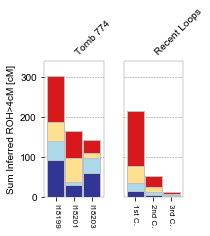

In [18]:
plot_dfs, cols = prepare_dfs_plot(dft, cms=[4, 8, 12, 20],  col_group='label')

plot_panel_row(plot_dfs[:], wspace=0.0, r_title=45, leg_pos=-2,
               figsize=(2.5, 2.5), title_col="label",
               ylim=[0, 340], hlines=[100,200, 300, 400], Ns=[],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/T774_ROH.v2.pdf")

# 2) Plot ROH panel (Extended Figure)

### Plot Upper Row: Context Individuals and Legend

Saved figure to ./figures/hapROH/panel1a.v2.pdf


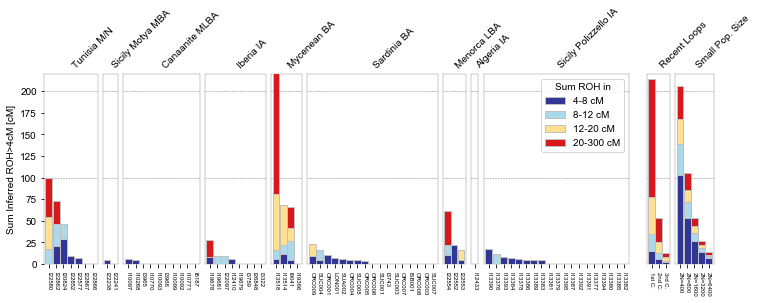

In [38]:
plot_dfs, cols = prepare_dfs_plot(df_c1, cms=[4, 8, 12, 20],  col_group='label')

plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(12, 3.5), title_col="label", fs_x=6,
               ylim=[0, 220], hlines=[100,200, 300, 400], cutoffs=[],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/panel1a.v2.pdf")

# Plot lower row of main ROH Fig.: All the Punic samples

In [6]:
df_clst = pd.read_csv("./data/cluster_assignments_punic.v54.1h.tsv", sep="\t")
print(f"Loaded Cluster Information for {len(df_clst)} Individuals.\n")
df_pun = df_clst.copy()

df_pun = df_pun[df_pun["label"].str.contains("Punic")].copy()
print(f"\nLoaded {len(df_pun)} Punic Indiviudals")

### With ROH info:
df_proh = pd.merge(df_pun, df1, on="iid")
print(f"With ROH info: n={len(df_proh)}")

Loaded Cluster Information for 153 Individuals.


Loaded 140 Punic Indiviudals
With ROH info: n=90


In [20]:
### Modify df so that groups cluster automatically in ROH plot

In [7]:
df_proh["label"].value_counts()

Punic_Early    44
Punic_Late     25
Punic_NoRC     13
Punic_Late2     8
Name: label, dtype: int64

In [8]:
df_proh["location"].value_counts()

Kerkouene     21
Tharros       11
Carthage      10
Birgi          9
Motya          7
Lilybaeum      6
Eivissa        5
Villaricos     4
Selinunte      4
Malaga         4
Akhziv         4
Villamar       2
Palermo        1
MonteSirai     1
Cadiz          1
Name: location, dtype: int64

In [40]:
### Make label for ROH plot
df_proh["label_roh"] = df_proh["location"] + " " + df_proh["label"]
df_proh["label_roh"] = df_proh["label_roh"].str.replace("_", " ")
df_proh["label_roh"] = df_proh["label_roh"].str.replace("Punic ", "")
df_proh["label_roh"] = df_proh["label_roh"].str.replace("Kerkouene", "Kerkouane")
df_proh["label_roh"] = df_proh["label_roh"].str.replace("Eivissa", "Ibiza")

### Make order for ROH plot
sites = ["Kerkouene", "Carthage", "Tharros", "Villamar", "MonteSirai", "Birgi", 
         "Motya", "Lilybaeum", "Selinunte", "Palermo", "Eivissa", "Malaga", "Cadiz", "Akhziv"]
periods = ["Punic_Early", "Punic_Late", "Punic_Late2", "Punic_NoRC"]

i=1
for s in sites:
    for p in periods:
        idx = (df_proh["location"]==s) & (df_proh["label"]==p)
        df_proh.loc[idx, "age"] = -i
        i = i+1

In [ ]:
plot_dfs, cols = prepare_dfs_plot(df_proh, cms=[4, 8, 12, 20], 
                                  col_group='label_roh')

idx = df_proh["location"]=="Kerkouene"
df_proh["label_roh"][idx]


Saved figure to ./figures/hapROH/panel1b.pdf


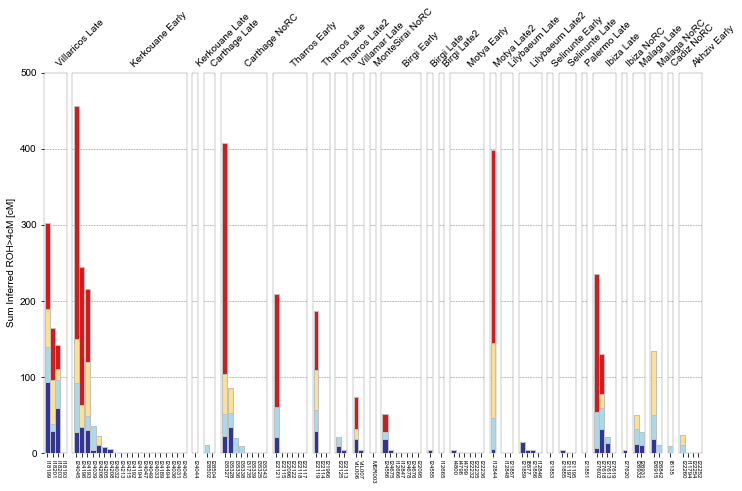

In [41]:
plot_dfs, cols = prepare_dfs_plot(df_proh, cms=[4, 8, 12, 20],  col_group='label_roh')

plot_panel_row(plot_dfs[:], wspace=0.3, r_title=45, leg_pos=0,
               figsize=(12, 7.0), title_col="label_roh",fs_x=6,
               ylim=[0, 500], hlines=[100,200, 300, 400], cutoffs=[],
               degrees=[], Ns=[], 
               savepath="./figures/hapROH/panel1b.pdf")

## Legacy Version with manual IID settings

In [69]:
iids = ["I12666", "I12847", "I24678",
        "I24676",  "I24675",  "I24556",
        "I22095",  "I4798", "I4799", "I4800",
        "I7762", "I22236", "I21853"]
df_t = get_iids_df(df1, iids)
df_t["clst"] = "Sicily Punic \n800-400 calBCE"

iids = ["I24555", "I12848", "I21857",
        "I21197",  "I21855"]

df_tl = get_iids_df(df1, iids)
df_tl["clst"] = "Sicily Punic \n400-200 calBCE"

iids = ["I22115", "I22121", "I22096",
        "I22122", "I22118", "I22117"]
df_t2 = get_iids_df(df1, iids)
df_t2["clst"] = "Tharros Punic \n800-400 calBCE"

iids = ["I22114", "I22119", "I21966"]
df_t2l = get_iids_df(df1, iids)
df_t2l["clst"] = "Tharros Punic \n400-200 calBCE"

iids = ["I26842.v47", "I26915", "I26931", "I26932"] # Cadir Individual

df_t3 = get_iids_df(df1, iids)
df_t3["clst"] = "Malaga Punic"

# "I18193", "I18189","I18191",
iids = [ "I18199", "I18200", "I18201", 
        "I18203", "I18202"]
df_t4 = get_iids_df(df1, iids)
df_t4["clst"] = "Villaricos \nAegean Cluster"

df_t5 = df1[df1["clst"].str.contains("Israel_Phoen")].copy()
df_t5["clst"] = "Israel Phoenician"

iids = ["I27602", "I27618", "I27619", "I27620", "I27610", "I27614", "I27613"]
df_t6 = get_iids_df(df1, iids)
df_t6["clst"] = "Eivissa Punic"

Found 12/13 Individuals
Found 5/5 Individuals
Found 6/6 Individuals
Found 3/3 Individuals
Found 4/4 Individuals
Found 3/5 Individuals
Found 4/7 Individuals


Saved figure to ./figures/hapROH/panel2.pdf


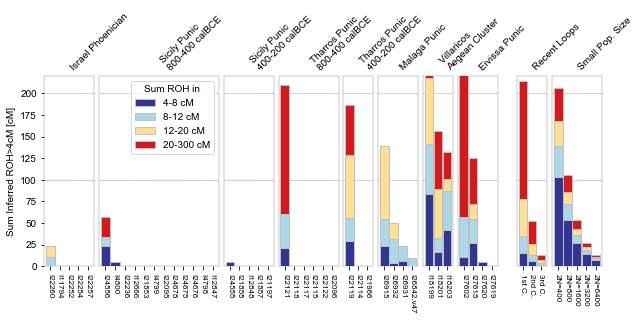

In [70]:
plot_panel_row((df_t5, df_t, df_tl, df_t2, df_t2l, df_t3, df_t4, df_t6), wspace=0.1, r_title=45, leg_pos=-7,
               figsize=(10, 3.5),
               ylim=[0, 220], hlines=[100,200, 300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/panel2.pdf")

# Spain Punic

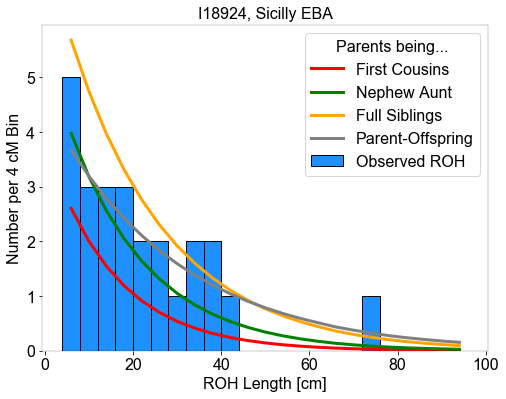

In [21]:
plot_pde_individual(iid="I18924", folder='./hapsburg_runs/output/v43_full/', 
                    prefix_out='', title="I18924, Sicilly EBA",
                    ms=[6, 5, 4, 3],  comm_ancs=[4, 4, 4, 2],
                    labels=['First Cousins', "Nephew Aunt", "Full Siblings", "Parent-Offspring"],
                    savepath="") # ./hapsburg_runs/dumpster/for_alissa/curves_HIM001.png

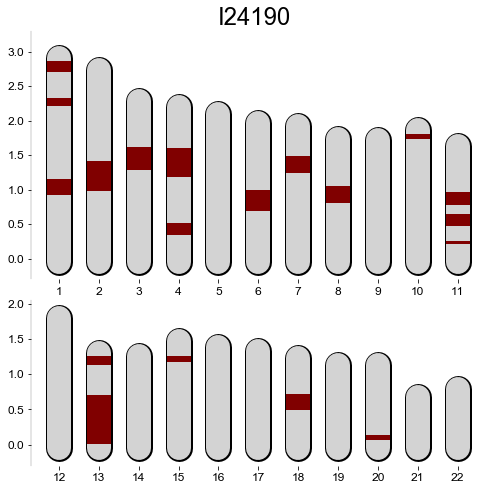

In [47]:
plot_roh_individual(iid="I24190", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  #

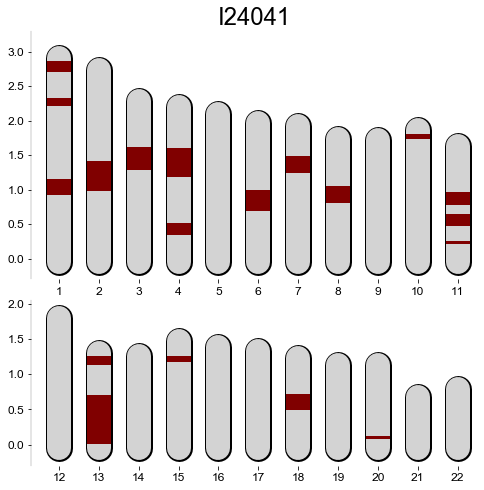

In [42]:
plot_roh_individual(iid="I24041", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # ./hapsburg_runs/figures/v46/I24367_karyo.pdf

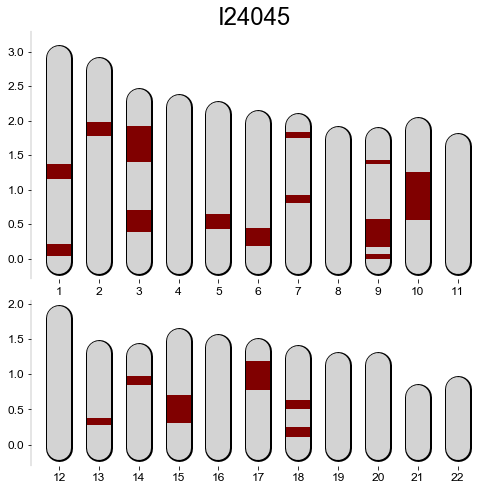

In [45]:
plot_roh_individual(iid="I24045", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # 

In [ ]:
plot_roh_individual(iid="I24045", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # 

Successfully loaded Data from: ./hapsburg_runs/output/v43_full/HIM001.SG/chr17/


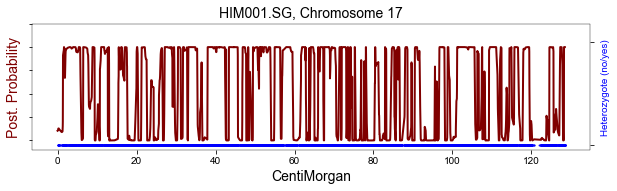

In [4]:
plot_posterior_cm(folder = "./hapsburg_runs/output/v43_full/HIM001.SG/chr17/", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="HIM001.SG, Chromosome 17",
                  savepath=""
                  )

# 